In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 split
from sklearn.model_selection import train_test_split

# 회귀분석
import statsmodels.formula.api as smf
import statsmodels.formula.api as ol

from sklearn.tree import DecisionTreeRegressor
# 앙상블 모델
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 주피터 노트북 사용시 그래프 자동 출력 옵션
%matplotlib inline

# 폰트 설정
matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percenatage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) *  100

In [3]:
df_raw = pd.read_csv("./Data/체질검사.csv", engine="python")

# 목표변수, 설명변수 분리
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis=1, inplace = False)

# 데이터 분할 (7:3)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, 
                                                                test_size=0.3, random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (176, 13)
train data Y size: (176,)
test data X size: (76, 13)
test data Y size: (76,)


In [4]:
# 회귀모델
lr_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           4.38e-68
Time:                        10:01:23   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

In [5]:
# Decision Tree 모델
dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, 
                                 min_samples_split=20, max_depth=4)
dt_model.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(dt_model.score(df_train_x, df_train_y)))

#test데이터 설명력
print("Score on test set: {:.3f}".format(dt_model.score(df_test_x, df_test_y)))

Score on training set: 0.783
Score on test set: 0.570


In [17]:
# RandomForest 모델
rf_model = RFR(random_state=1234, n_estimators = 100, min_samples_leaf = 6, 
             min_samples_split=14, max_depth=4)
rf_model.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_model.score(df_train_x, df_train_y)))

#test데이터 설명력
print("Score on test set: {:.3f}".format(rf_model.score(df_test_x, df_test_y)))

Score on training set: 0.825
Score on test set: 0.627


In [32]:
# Gradient Boosting 모델
gb_model = GBR(random_state=1234, n_estimators = 30, min_samples_leaf = 11, 
             min_samples_split=22, max_depth=4, learning_rate=0.1)
gb_model.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_model.score(df_train_x, df_train_y)))

#test데이터 설명력
print("Score on test set: {:.3f}".format(gb_model.score(df_test_x, df_test_y)))

Score on training set: 0.900
Score on test set: 0.629


## 3. 예측 및 평가

### 예측 평가 리스트 생성

In [27]:
# 모델 리스트, 그래프를 그리기 위한 생성 목적
models=["Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

# 평가 리스트 초기화
mse, rmse, mae, mape = [], [], [], []

1) Regression

In [28]:
lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percenatage_error(df_test_y, lr_y_pred))

2) Decision Tree

In [29]:
dt_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percenatage_error(df_test_y, dt_y_pred))

3) Random Forest

In [30]:
rf_y_pred = rf_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percenatage_error(df_test_y, rf_y_pred))

4) Grdient Boosting

In [33]:
gb_y_pred = gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percenatage_error(df_test_y, gb_y_pred))

### 평가 시각화

Text(0.5, 1.0, 'mape')

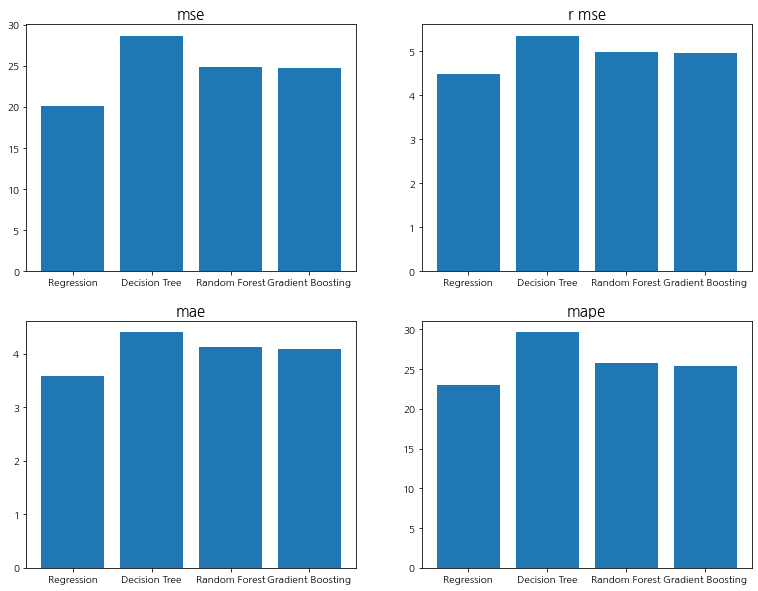

In [35]:
## 그래프 커스터 마이징

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (13, 10))

ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse", fontsize = 15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("r mse", fontsize = 15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae", fontsize = 15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape", fontsize = 15)

- Regression 모델이 모든 평가 지표에서 가장 점수가 낮게 나왔기에 성능이 가장 좋다고 할 수 있다. 반면에 Decision Tree모델의 성능이 가장 좋지 않다고 할 수 있다. 평가지표별 모델의 정확도 "추세"는 동일하게 나타난다.